In [75]:
from pydicom import dcmread
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import median_filter
from sklearn.cluster import KMeans

In [34]:
path = dcmread('12295137-3802-4975-aa32-92e83052fef6')

In [35]:
arr = path.pixel_array
def showImg(arr):
    plt.imshow(arr, cmap="gray")
    plt.show()

In [61]:
mean = np.mean(arr)
std = np.std(arr)
standardized = (arr - mean)/std


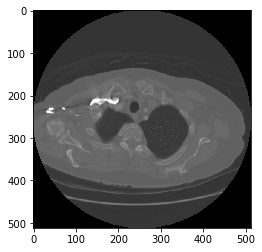

In [62]:
showImg(arr)

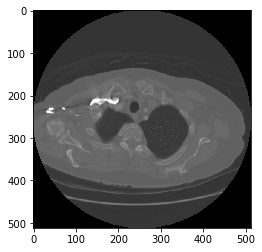

In [63]:
showImg(standardized)

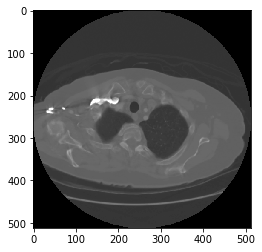

In [74]:
filtered = median_filter(standardized,size = 3)
showImg(filtered)

In [78]:
kmeans = KMeans(n_clusters=2).fit(np.reshape(filtered,[np.prod(filtered.shape),1]))
centers = sorted(kmeans.cluster_centers_.flatten())

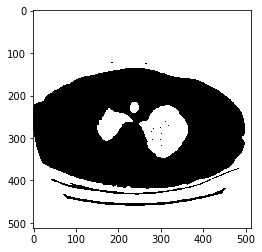

In [81]:
threshold = np.mean(centers)
threshed = np.where(filtered<threshold,1.0,0.0)
showImg(threshed)